In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd 

## 1) Déclaration Arborescence


In [3]:
INPUT_DIR = "Data/Alzheimer_s Dataset/"
BASE_TRAIN_DIR = INPUT_DIR + "train/"
train_path = BASE_TRAIN_DIR

## 2) Chargement des images (trainX) et leur étiquettage (trainY0)

In [4]:
train_batches = ImageDataGenerator(validation_split=0.1) \
                .flow_from_directory(train_path,  
                                     classes = ['NonDemented', 'VeryMildDemented', 
                                                'MildDemented', 'ModerateDemented'], target_size=(64,64),
                                     subset='training',
                                     batch_size=10000)
trainX, trainY0  = train_batches.next()
#### STANDARISATION #####
trainX= trainX/255

Found 4610 images belonging to 4 classes.


In [5]:
print("Y est en hot encoder avec 4 colonnes, une pour chaque classe")
display(trainY0)
print("#### Concatémer le multi values en  colonne  #####")
s = pd.DataFrame(trainY0)
y = pd.get_dummies(s).idxmax(1)
trainY = y.to_numpy()
display(trainY)

Y est en hot encoder avec 4 colonnes, une pour chaque classe


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

#### Concatémer le multi values en  colonne  #####


array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

## 3) Exploration data 

<function matplotlib.pyplot.show(close=None, block=None)>

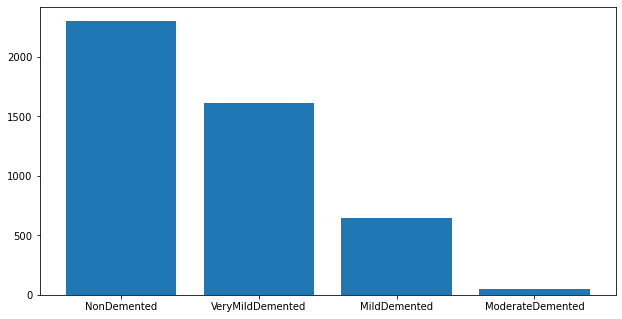

In [6]:
CLASSE  = ['NonDemented', 'VeryMildDemented', 'MildDemented', 'ModerateDemented'] 
#plot the samples count
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([0,0,1,1])
ax.bar(CLASSE,y.value_counts())
plt.show

# Les données sont débalancées 